## XGBoost

In [1]:
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
print(xgb.__version__)

1.7.3


In [3]:
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

dataset = load_breast_cancer()
featrues = dataset.data
labels = dataset.target
cancer_df = pd.DataFrame(data = featrues, columns = dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [4]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [5]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지 :-1 슬라이싱으로 추출

X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X_features,y_label, test_size = 0.2, random_state = 156)

X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train, test_size = 0.1, random_state = 156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [6]:
# 학습, 검증, 테스트용 DMatrix 생성.
dtr = xgb.DMatrix(data = X_tr, label = y_tr)
dval = xgb.DMatrix(data = X_val, label = y_val)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [7]:
params = {'max_depth' : 3,
          'eta' : 0.05,
          'objective' : 'binary:logistic',
          'eval_metric' : 'logloss'
          }

num_rounds = 400

In [8]:
eval_list = [(dtr,'train'),(dval,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train()함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round = num_rounds, early_stopping_rounds = 50, evals=eval_list)

[0]	train-logloss:0.65016	eval-logloss:0.66183
[1]	train-logloss:0.61131	eval-logloss:0.63609
[2]	train-logloss:0.57563	eval-logloss:0.61144
[3]	train-logloss:0.54310	eval-logloss:0.59204
[4]	train-logloss:0.51323	eval-logloss:0.57329
[5]	train-logloss:0.48447	eval-logloss:0.55037
[6]	train-logloss:0.45796	eval-logloss:0.52930
[7]	train-logloss:0.43436	eval-logloss:0.51534
[8]	train-logloss:0.41150	eval-logloss:0.49718
[9]	train-logloss:0.39027	eval-logloss:0.48154
[10]	train-logloss:0.37128	eval-logloss:0.46990
[11]	train-logloss:0.35254	eval-logloss:0.45474
[12]	train-logloss:0.33528	eval-logloss:0.44229
[13]	train-logloss:0.31892	eval-logloss:0.42961
[14]	train-logloss:0.30439	eval-logloss:0.42065
[15]	train-logloss:0.29000	eval-logloss:0.40958
[16]	train-logloss:0.27651	eval-logloss:0.39887
[17]	train-logloss:0.26389	eval-logloss:0.39050
[18]	train-logloss:0.25210	eval-logloss:0.38254
[19]	train-logloss:0.24123	eval-logloss:0.37393
[20]	train-logloss:0.23076	eval-logloss:0.36789
[2

In [9]:
pred_probs = xgb_model.predict(dtest)
print('predict()수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

#예측확률이 0.5보다 크면 1, 아니면 0으로 결정하여 preds에 저장
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

predict()수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.845 0.008 0.68  0.081 0.975 0.999 0.998 0.998 0.996 0.001]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [11]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9937


In [12]:
# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력. 미 입력해도 수행에 문제 없음.   
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [13]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


In [14]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=50, eval_metric="logloss", 
                eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

In [15]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9947


In [16]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61482
[1]	validation_0-logloss:0.55287
[2]	validation_0-logloss:0.50132
[3]	validation_0-logloss:0.45551
[4]	validation_0-logloss:0.41746
[5]	validation_0-logloss:0.38430
[6]	validation_0-logloss:0.35573
[7]	validation_0-logloss:0.32857
[8]	validation_0-logloss:0.30492
[9]	validation_0-logloss:0.28391
[10]	validation_0-logloss:0.26709
[11]	validation_0-logloss:0.24999
[12]	validation_0-logloss:0.23464
[13]	validation_0-logloss:0.22163
[14]	validation_0-logloss:0.20955
[15]	validation_0-logloss:0.19918
[16]	validation_0-logloss:0.19062
[17]	validation_0-logloss:0.18180
[18]	validation_0-logloss:0.17274
[19]	validation_0-logloss:0.16719
[20]	validation_0-logloss:0.16121
[21]	validation_0-logloss:0.15456
[22]	validation_0-logloss:0.14983
[23]	validation_0-logloss:0.14425
[24]	validation_0-logloss:0.14220
[25]	validation_0-logloss:0.13780
[26]	validation_0-logloss:0.13402
[27]	validation_0-logloss:0.13147
[28]	validation_0-logloss:0.12763
[29]	validation_0-loglos

## 07 LightGBM

In [17]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train,X_test,y_train,y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)
# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리 
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train, test_size = 0.1, random_state = 156)
# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimator = 400, learning_rate = 0.05)
# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_tr,y_tr),(X_val,y_val)]
lgbm_wrapper.fit(X_tr,y_tr,early_stopping_rounds = 50, eval_metric='logloss', eval_set = evals, verbose = True)

pred = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid

In [18]:
get_clf_eval(y_test,preds,pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,    F1: 0.9677, AUC:0.9856


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

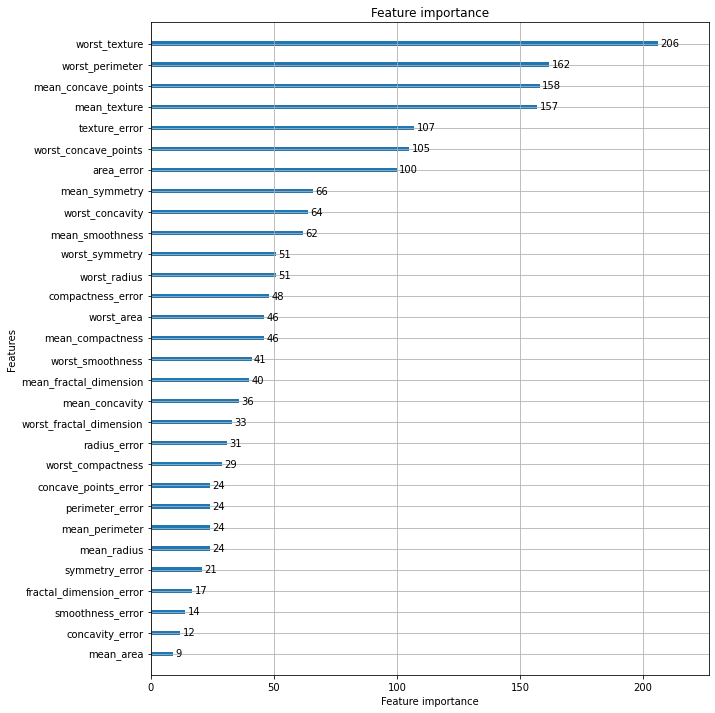

In [19]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,12))
plot_importance(lgbm_wrapper, ax=ax)

In [20]:
from hyperopt import hp

search_space = {'x':hp.quniform('x',-10,10,1),'y':hp.quniform('y',-15,15,1)}

In [21]:
from hyperopt import STATUS_OK

def objective_func(search_space):
    x = search_space['x']
    y = search_space['y']
    retval = x**2 - 20*y

    return retval

In [22]:
from hyperopt import fmin, tpe, Trials
import numpy as np

trial_val = Trials()
rng = np.random.default_rng(seed = 0)

best_01 = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 5, trials = trial_val)
print('best:', best_01)

100%|██████████| 5/5 [00:00<00:00, 884.54trial/s, best loss: -255.0]
best: {'x': 5.0, 'y': 14.0}


In [23]:
trial_val =Trials()

best_02 = fmin(fn = objective_func, space = search_space, algo = tpe.suggest, max_evals = 20, trials = trial_val)
print('best:',best_02)

100%|██████████| 20/20 [00:00<00:00, 1015.47trial/s, best loss: -280.0]
best: {'x': -0.0, 'y': 14.0}


In [24]:
# fmin( )에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적 함수 반환값들이 저장됨
# 리스트 내부의 개별 원소는 {'loss':함수 반환값, 'status':반환 상태값} 와 같은 딕셔너리임. 
print(trial_val.results)

[{'loss': -91.0, 'status': 'ok'}, {'loss': -236.0, 'status': 'ok'}, {'loss': -96.0, 'status': 'ok'}, {'loss': 249.0, 'status': 'ok'}, {'loss': 89.0, 'status': 'ok'}, {'loss': -139.0, 'status': 'ok'}, {'loss': 9.0, 'status': 'ok'}, {'loss': 316.0, 'status': 'ok'}, {'loss': 101.0, 'status': 'ok'}, {'loss': 200.0, 'status': 'ok'}, {'loss': -11.0, 'status': 'ok'}, {'loss': -64.0, 'status': 'ok'}, {'loss': 309.0, 'status': 'ok'}, {'loss': -280.0, 'status': 'ok'}, {'loss': -71.0, 'status': 'ok'}, {'loss': 44.0, 'status': 'ok'}, {'loss': 289.0, 'status': 'ok'}, {'loss': 149.0, 'status': 'ok'}, {'loss': -231.0, 'status': 'ok'}, {'loss': -251.0, 'status': 'ok'}]


In [25]:
# Trials 객체의 vals 속성에 {'입력변수명':개별 수행 시마다 입력된 값 리스트} 형태로 저장됨.
print(trial_val.vals)

{'x': [-7.0, 2.0, -8.0, 3.0, 7.0, -1.0, -7.0, -6.0, -1.0, 0.0, 3.0, 6.0, 7.0, -0.0, -3.0, -8.0, 7.0, -7.0, 3.0, -3.0], 'y': [7.0, 12.0, 8.0, -12.0, -2.0, 7.0, 2.0, -14.0, -5.0, -10.0, 1.0, 5.0, -13.0, 14.0, 4.0, 1.0, -12.0, -5.0, 12.0, 13.0]}


In [26]:
import pandas as pd

losses = [loss_dict['loss'] for loss_dict in trial_val.results]

result_df = pd.DataFrame({'x':trial_val.vals['x'], 'y':trial_val.vals['y'], 'losses':losses})
result_df

,x,y,losses
0,-7.0,7.0,-91.0
1,2.0,12.0,-236.0
2,-8.0,8.0,-96.0
3,3.0,-12.0,249.0
4,7.0,-2.0,89.0
5,-1.0,7.0,-139.0
6,-7.0,2.0,9.0
7,-6.0,-14.0,316.0
8,-1.0,-5.0,101.0
9,0.0,-10.0,200.0


## HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화

In [27]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)

X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train, test_size = 0.1, random_state = 156)

In [29]:
from hyperopt import hp

xgb_search_space = {'max_depth':hp.quniform('max_depth', 5, 20, 1),
                    'min_child_weight':hp.quniform('min_child_weight',1,2,1),
                    'learning_rate':hp.uniform('learning_rate',0.01,0.2),
                    'colsample_bytree':hp.uniform('colsample_bytree',0.5,1)
                    }

In [30]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

# fmin()에서 입력된 search_space값으로 입력된 모든 값은 실수형임. 
# XGBClassifier의 정수형 하이퍼 파라미터는 정수형 변환을 해줘야 함. 
# 정확도는 높은 수록 더 좋은 수치임. -1* 정확도를 곱해서 큰 정확도 값일 수록 최소가 되도록 변환
def objective_func(search_space):
    # 수행 시간 절약을 위해 n_estimators는 100으로 축소
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            learning_rate=search_space['learning_rate'],
                            colsample_bytree=search_space['colsample_bytree'], 
                            eval_metric='logloss')
    
    accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)
        
    # accuracy는 cv=3 개수만큼의 정확도 결과를 가지므로 이를 평균해서 반환하되 -1을 곱해줌. 
    return {'loss':-1*np.mean(accuracy), 'status': STATUS_OK}

In [31]:
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func, 
            space=xgb_search_space, 
            algo=tpe.suggest, 
            max_evals=20, 
            trials=trial_val, rstate=np.random.default_rng(seed=9))
print('best:', best)

100%|██████████| 20/20 [00:02<00:00,  6.91trial/s, best loss: -0.964868711513884] 
best: {'colsample_bytree': 0.5325012994457242, 'learning_rate': 0.09177140952220303, 'max_depth': 9.0, 'min_child_weight': 2.0}


In [32]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(round(best['colsample_bytree'], 5),round(best['learning_rate'], 5), int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.5325, learning_rate:0.09177, max_depth:9, min_child_weight:2


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    auc = roc_auc_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))

In [34]:
xgb_wrapper = XGBClassifier(n_estimator = 400,
                            learning_rate = round(best['learning_rate'],5),
                            max_depth = int(best['max_depth']),
                            min_child_weight = int(best['min_child_weight']),
                            colsample_bytree = round(best['colsample_bytree'],5)
                            )
evals = [(X_tr,y_tr),(X_val,y_val)]
xgb_wrapper.fit(X_tr,y_tr,early_stopping_rounds = 50, eval_metric='logloss',
                eval_set = evals, verbose = True)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test,preds, pred_proba)

[13:03:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

[0]	validation_0-logloss:0.61629	validation_1-logloss:0.63904
[1]	validation_0-logloss:0.55204	validation_1-logloss:0.59014
[2]	validation_0-logloss:0.49683	validation_1-logloss:0.54821
[3]	validation_0-logloss:0.44952	validation_1-logloss:0.51168
[4]	validation_0-logloss:0.40869	validation_1-logloss:0.48798
[5]	validation_0-logloss:0.37268	validation_1-logloss:0.46103
[6]	validation_0-logloss:0.34113	validation_1-logloss:0.43617
[7]	validation_0-logloss:0.31374	validation_1-logloss:0.41579
[8]	validation_0-logloss:0.28843	validation_1-logloss:0.39682
[9]	validation_0-logloss:0.26602	validation_1-logloss:0.38102
[10]	validation_0-logloss:0.24510	validation_1-logloss:0.36633
[11]	validation_0-logloss:0.22734	validation_1-logloss:0.35490
[12]	validation_0-logloss:0.21173	validation_1-loglos